<a href="https://colab.research.google.com/github/divyadharshini-dd-02/githubemc1/blob/main/time_ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

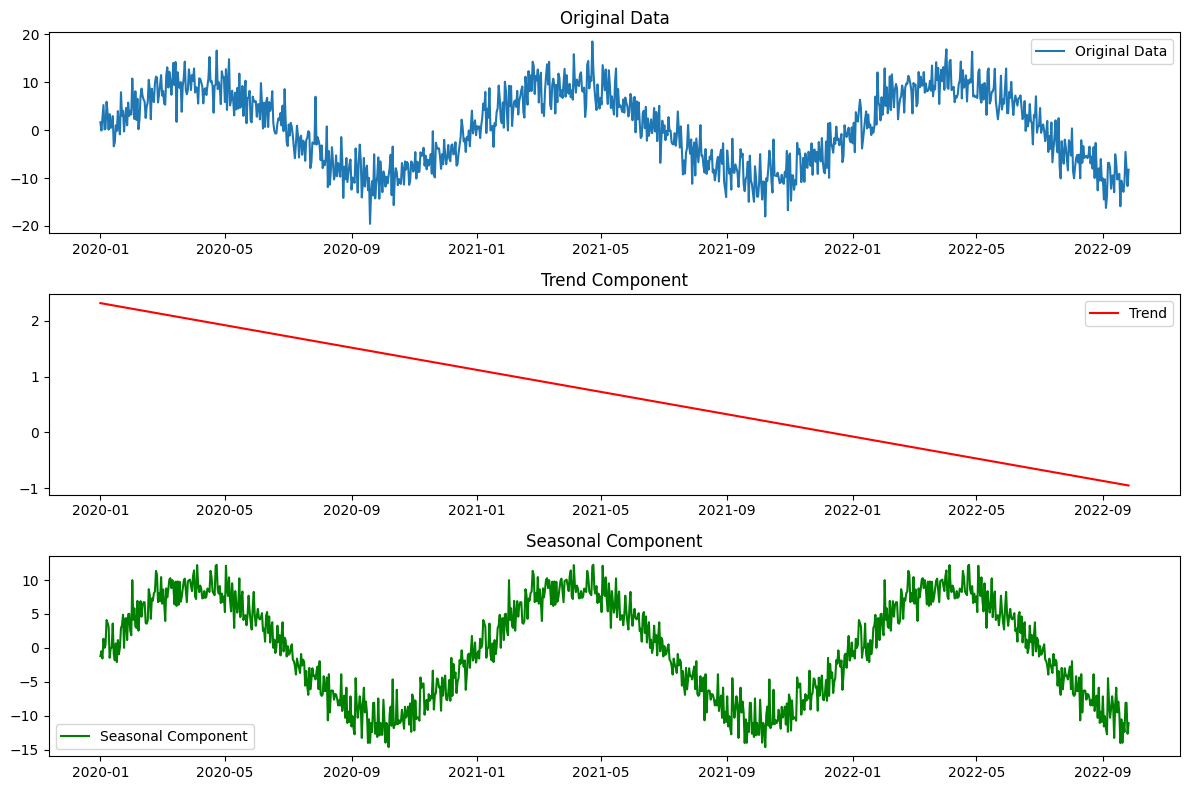

               Value  TimeIndex     Trend  Detrended  DayOfYear  Seasonal
Time                                                                     
2020-01-01  1.662276          0  2.315088  -0.652812          1 -1.204651
2020-01-02 -0.070577          1  2.311817  -2.382394          2 -0.489151
2020-01-03  2.459262          2  2.308547   0.150715          3 -1.553700
2020-01-04  5.257114          3  2.305277   2.951837          4  1.357793
2020-01-05  0.157188          4  2.302006  -2.144818          5  0.016466


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df=pd.read_csv("/content/time.csv")
# Generate a large dataset with a daily seasonal pattern
np.random.seed(42)
data_size = 1000
time = pd.date_range(start='2020-01-01', periods=data_size, freq='D')

# Simulating a seasonal pattern with noise (daily)
seasonal_pattern = 10 * np.sin(2 * np.pi * time.dayofyear / 365)
values = seasonal_pattern + np.random.normal(scale=3, size=data_size)

# Create a DataFrame with the time series data
df = pd.DataFrame({'Time': time, 'Value': values})
df.set_index('Time', inplace=True)

# Step 1: Remove the overall trend using linear regression
df['TimeIndex'] = np.arange(len(df))

X = df['TimeIndex'].values.reshape(-1, 1)
y = df['Value'].values

# Linear regression to fit the trend
model = LinearRegression()
model.fit(X, y)
df['Trend'] = model.predict(X)

# Detrend the data
df['Detrended'] = df['Value'] - df['Trend']

# Step 2: Calculate the seasonal component by averaging the detrended values
# Group by the day of the year to get the seasonal pattern
df['DayOfYear'] = df.index.dayofyear
seasonal_means = df.groupby('DayOfYear')['Detrended'].mean()

# Map the seasonal values back to the full dataset
df['Seasonal'] = df['DayOfYear'].map(seasonal_means)

# Step 3: Plot the original data, trend, and seasonal components
plt.figure(figsize=(12, 8))

# Plot original data
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Value'], label='Original Data')
plt.title('Original Data')
plt.legend()

# Plot trend
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Trend'], label='Trend', color='red')
plt.title('Trend Component')
plt.legend()

# Plot seasonal component
plt.subplot(3, 1, 3)
plt.plot(df.index, df['Seasonal'], label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.tight_layout()
plt.show()

# Print the first few rows to see the results
print(df.head())